# Final Consolidated Exploratory Data Analysis 
### Agenda: Consolidating final shortlisted features

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os

print(os.getcwd())

/home/ML_course


In [2]:
# Load in original datasets
X_train = pd.read_csv('../EC_Project1/dataset_to_release/x_train.csv')
y_train = pd.read_csv('../EC_Project1/dataset_to_release/y_train.csv')
# X_test = pd.read_csv('../EC_Project1/dataset_to_release/x_test.csv')

## Load in One Hot Encoded dataset

In [4]:
df1 = pd.read_csv('state.csv')
df2 = pd.read_csv('flushot6.csv')
df3 = pd.read_csv('adeat1.csv')

# Concatenate the DataFrames vertically (column-wise) to combine them
data_frames = [df1, df2, df3]
df1.index.name = 'pid'
df2.index.name = 'pid'
df3.index.name = 'pid'

# First merge df1 & df2
df1_and_df2 = pd.merge(df1, df2, left_index=True, right_index=True, how='outer')

# Final merge
final_df = pd.merge(df3, df1and2, left_index=True, right_index=True, how='outer')

# Save the combined data to a new CSV file
final_df.to_csv('final_data.csv', index=False)


KeyboardInterrupt



In [5]:
final_df['_MICHD'] = y_train['_MICHD']
final_df.head()

,_RFHLTH_2,_RFHYPE5_2,_AGE65YR_2,_AGE_G_6,_HCVU651_7,_RFCHOL_2,_PNEUMO2_1,_DRDXAR1_1,_FLSHOT6_1,_LMTACT1_1,...,DIABETE3_3,QLACTLM2_2,CHCCOPD1_2,DIFFWALK_2,CVDSTRK3_2,BPHIGH4_3,BPMEDS_7,PNEUVAC3_1,PNEUVAC3_2,_MICHD
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-1
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1
2,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-1
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-1


## Remove redundant columns
- Seive through similar ones manually
- Check variables' correlations and remove those that are too highly correlated

### Manual check
- `HAVARTH3`: (Ever told) you have some form of arthritis? > Included in `_DRDXAR1`</br>
- `SMOKDAY2`: Do you now smoke cigarettes every day, some days or not at all? > Included in `_SMOKER3`</br>
- `ARTHSOCL`: During the past 30 days, how has your arthiritis or joint symptoms interfered with your normal social activities, such as going shopping, etc.? > Similar to `_LMTSCL1`</br>
- `LMTJOIN3`: Are you now limited in any way in any of your usual activities because of arthritis or joint symptoms? > Similar to `_LMTACT1`</br>
- `ARTHDIS2`: Do arthritis or joint symptoms now affect whether you work, the type or amount of work you do? > Similar to `_LMTWRK1`</br>
- `PNEUVAC3`: Have you ever had a pneumonia shot? > Included in `_PNEUMO2`</br>
- `GENHLTH`: Rate your general health > Included in `_RFHLTH`</br>



In [6]:
titles_to_drop = ['HAVARTH3', 'SMOKDAY2', 'ARTHSOCL', 'LMTJOIN3', 'ARTHDIS2', 'PNEUVAC3', 'GENHLTH']
cols_to_drop = [col for col in final_df.columns if any(title in col for title in titles_to_drop)]
final_df = final_df.drop(columns = cols_to_drop)
final_df

,_RFHLTH_2,_RFHYPE5_2,_AGE65YR_2,_AGE_G_6,_HCVU651_7,_RFCHOL_2,_PNEUMO2_1,_DRDXAR1_1,_FLSHOT6_1,_LMTACT1_1,...,EMPLOY1_1,USEEQUIP_2,DIABETE3_3,QLACTLM2_2,CHCCOPD1_2,DIFFWALK_2,CVDSTRK3_2,BPHIGH4_3,BPMEDS_7,_MICHD
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,-1
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,-1
2,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,-1
328131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1
328132,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,-1
328133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1


## 1. Check correlation

In [7]:
corr_matrix = final_df.corr()

In [8]:
# List out the correlations in a tabular format
corr_table = corr_matrix.unstack().reset_index()
corr_table.columns = ['Variable 1', 'Variable 2', 'Correlation']

# List out the correlations above a certain threshold:
threshold = 0.9

# Filter correlations above the threshold
corr_table = corr_table[corr_table['Correlation'].abs() > threshold]

# Filter correlations below already noted down
done = 1
corr_table = corr_table[corr_table['Correlation'].abs() < done]

# Filter out correlations with themselves (correlation = 1) and duplicates
corr_table = corr_table[corr_table['Variable 1'] != corr_table['Variable 2']]
corr_table = corr_table[corr_table['Variable 1'] < corr_table['Variable 2']]

# Sort the correlations by absolute value in descending order
corr_table = corr_table.reindex(corr_table['Correlation'].abs().sort_values(ascending=False).index)

# Display the correlation table
corr_table

,Variable 1,Variable 2,Correlation
3364,BPMEDS_7,_RFHYPE5_2,-0.998631
1591,BPHIGH4_1,BPMEDS_7,-0.998631
121,_AGE65YR_2,_AGE_G_6,0.997190
1358,_RFHYPE5_1,_RFHYPE5_2,-0.994203
1557,BPHIGH4_1,_RFHYPE5_1,-0.994203
1302,_AGE65YR_1,_HCVU651_7,-0.993709
3386,BPMEDS_7,_RFHYPE5_1,0.992842
2346,VETERAN3_1,VETERAN3_2,-0.991777
1416,_RFHLTH_1,_RFHLTH_2,-0.991075
428,_DRDXAR1_1,_LMTACT1_3,-0.987235


### <u>Observation</u>
- Most with '7.0' means 'Don't know/ Not sure'
- TBR: to be removed</br>
#### Correlation of 1.00
- `_LMTSCL1_4.0`: `_LMTWRK1_3.0` : `_DRDXAR1_2.0` : `_LMTACT1_3.0` : All told to have no arthritis (done)</br> 
- `BPHIGH4_1.0`: Ever been told to have high BP, TBR. `_RFHYPE5_2`: Includes BPHIGH4 (done)</br>
- `TOLDHI2_1.0`: Ever been told to have high blood cholesterol, TBR. `_RFCHOL_2.0` : Includes TOLDHI2 & `BLOODCHO_1.0`</br>
#### Correlation of +0.97 to 0.997
- `_AGE65YR_2` : Age 65 or older`_AGE_G_6`: Age 65 or older, has more respondents, TBR.</br>
- `_FLSHOT6_7.0`: Don't know if got flu shot `_PNEUMO2_7.0`: Don't know if ever had pneumonia vacc, TBR.
#### Correlation of +0.86 to 0.90
- `_FLSHOT6_7.0` `_HCVU651_7`: TBR.
- `BPMEDS_1.0`: Taking medicine for high BP, TBR. `_RFHYPE5_2`: Told they have high BP. `BPHIGH4_1.0`</br>
- `_AGE65YR_1` : Age 18-64 `_HCVU651_1`: Respondents aged 18-64 who have any form of health care coverage: `HLTHPLN1` </br>
#### Correlation of +0.70 to 0.73
- `_AGE_G_6`: Age 65 or older, TBR. `_PNEUMO2_1.0`: Aged 65+ who ever had a pneumonia vacc: `PNEUVAC3`</br>
- `_FLSHOT6_1.0`: Aged 65+ who ever had a flu shot in past year `_PNEUMO2_1.0`</br></br>

#### Weaker Correlations
#### Correlation of +0.60 to 0.68
- `_HCVU651_1` `_PNEUMO2_1.0`</br>
- `EMPLOY1_7`: Currently retired, TBR. `_AGE_G_6`</br>
- `_LMTACT1_1.0`: Arthritis & limited usual activities `_LMTWRK1_1.0`: Arthritis & limited work, TBR.</br>
#### Correlation of +/-0.50++
- `_DRDXAR1_1.0`: Doctor diagnosed with arthritis, TBR. `_LMTACT1_1.0`</br>
- `DIFFWALK_2.0`: No difficulty walking or climbing stairs `USEEQUIP_2.0`: Do not need equipment to assist in walking, TBR.</br>
- `DIFFWALK_1.0/2.0` TBR. `QLACTLM2_1.0/2.0`: Limited in any way in any activities because of physical, mental, or emotional problems</br>

In [9]:
titles_to_drop = ['BPHIGH4', 'TOLDHI2', 'BPMEDS', 'EMPLOY1', '_LMTWRK1', '_PNEUMO2_7.0', '_AGE_G_6',
                  '_DRDXAR1', 'USEEQUIP', 'DIFFWALK', '_LMTSCL1_4.0', '_HCVU651_7', '_FLSHOT6_7.0']
cols_to_drop = [col for col in final_df.columns if any(title in col for title in titles_to_drop)]
new_df = final_df.drop(columns = cols_to_drop)
new_df

,_RFHLTH_2,_RFHYPE5_2,_AGE65YR_2,_RFCHOL_2,_PNEUMO2_1,_FLSHOT6_1,_LMTACT1_1,_LMTSCL1_1,_SMOKER3_3,_SMOKER3_4,...,BLIND_1,DIFFALON_2,VETERAN3_2,CHCKIDNY_2,INTERNET_1,DIABETE3_3,QLACTLM2_2,CHCCOPD1_2,CVDSTRK3_2,_MICHD
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,-1
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,-1
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,-1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1
328131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1
328132,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,-1
328133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1


## 2. Correlation with target variable 'MICHD'

In [10]:
corr_target_matrix = new_df.corr()

In [11]:
threshold = 0.1

all_corrs = corr_target_matrix['_MICHD']
filtered_corrs = all_corrs[(all_corrs > threshold) | (all_corrs < -threshold)]
sorted_corrs = filtered_corrs.sort_values(ascending = False)
print(sorted_corrs.to_string())

_MICHD        1.000000
_RFHLTH_2     0.234442
_RFHYPE5_2    0.216722
CVDSTRK3_1    0.205651
_AGE65YR_2    0.203165
_RFCHOL_2     0.191786
_PNEUMO2_1    0.186210
CHCCOPD1_1    0.185009
QLACTLM2_1    0.183879
DIABETE3_1    0.180166
_FLSHOT6_1    0.154002
_LMTACT1_1    0.150058
INTERNET_2    0.147492
DIFFALON_1    0.137909
CHCKIDNY_1    0.133746
CHOLCHK_1     0.133154
_LMTSCL1_1    0.127774
VETERAN3_1    0.119684
DIFFDRES_1    0.116388
MARITAL_3     0.112971
BLIND_1       0.103649
_SMOKER3_3    0.102091
_SMOKER3_4   -0.102412
DIFFALON_2   -0.114540
VETERAN3_2   -0.118872
_RFCHOL_1    -0.126920
CHCKIDNY_2   -0.136335
INTERNET_1   -0.143960
_LMTACT1_3   -0.167531
_LMTSCL1_4   -0.167531
_HCVU651_1   -0.168448
DIABETE3_3   -0.172744
QLACTLM2_2   -0.176852
_PNEUMO2_7   -0.186960
_FLSHOT6_7   -0.188884
CHCCOPD1_2   -0.188979
_AGE65YR_1   -0.198773
CVDSTRK3_2   -0.209280
_RFHYPE5_1   -0.217045
_RFHLTH_1    -0.234876


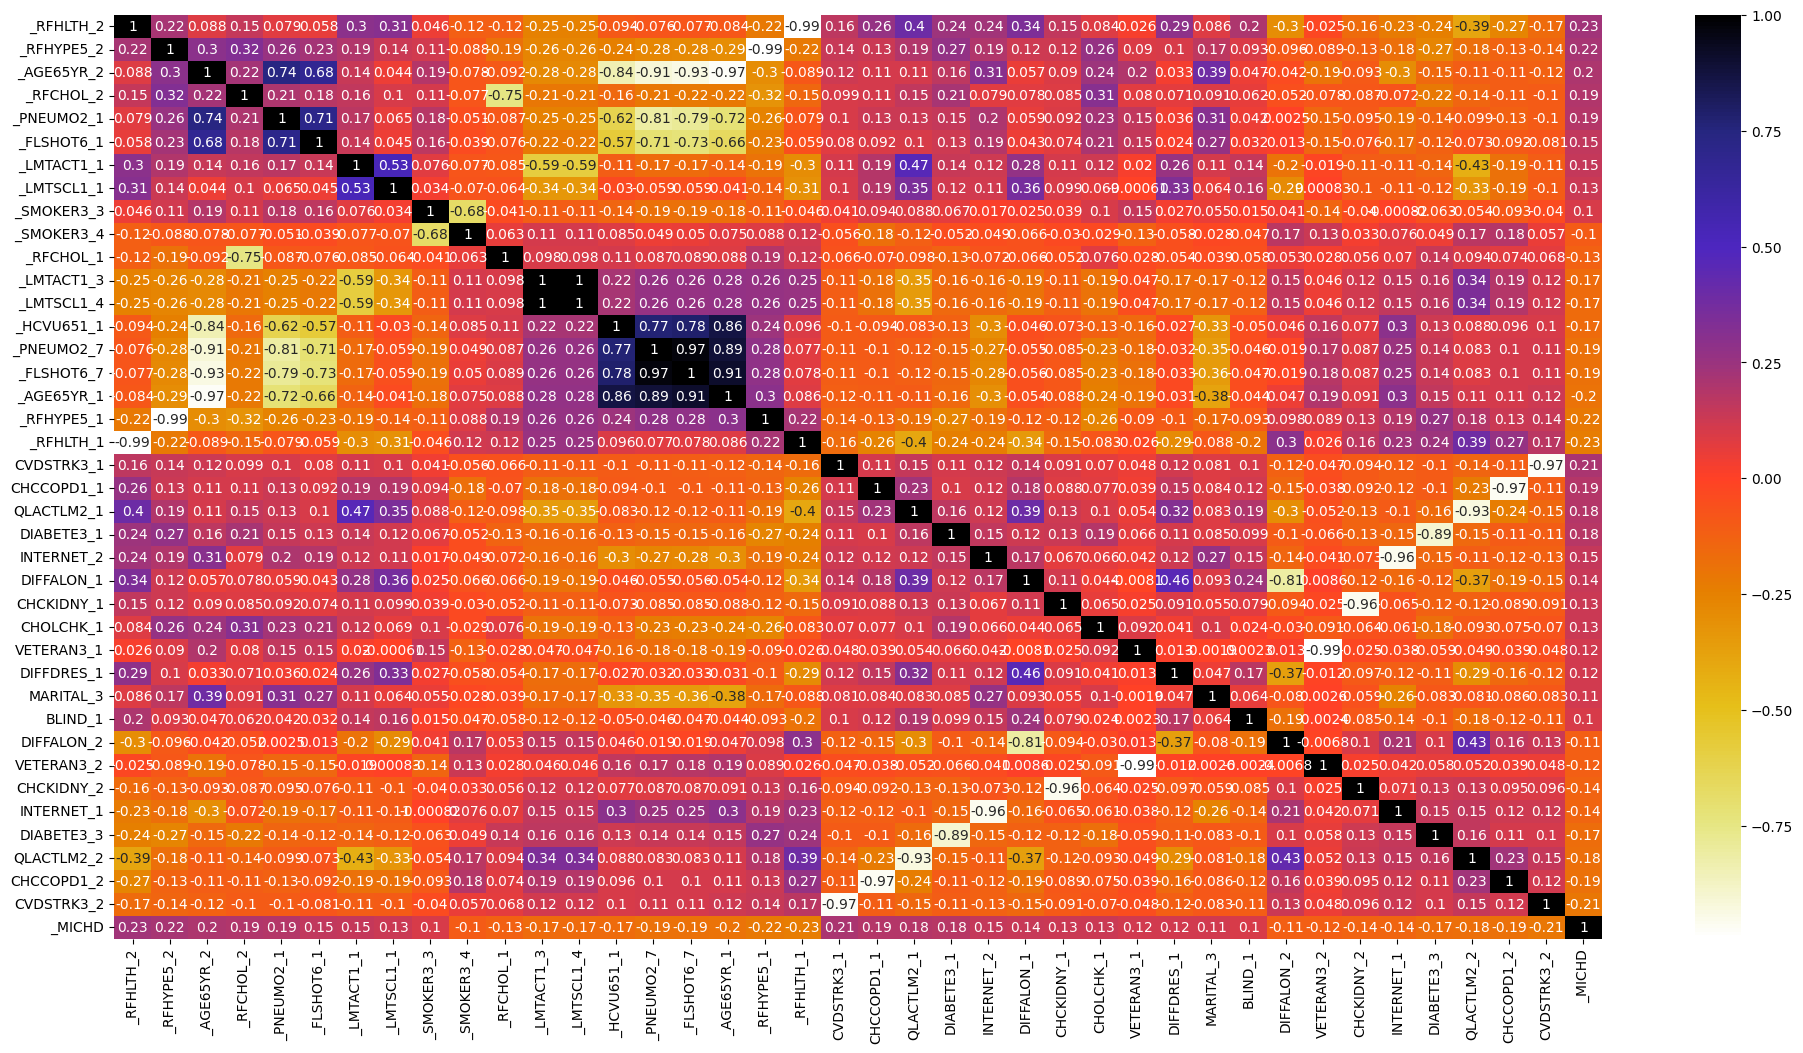

In [12]:
plt.figure(figsize=(24,12)) 
corr = new_df.corr() 
sb.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r) 
plt.show()

### <u>Observation</u>
- `QLACTLM2_2.0`: Not limited in any way in any activities because of physical, mental, or emotional problems `DIFFALON_2.0` : Because of a physical, mental, or emotional condition, do you have difficulty doing errands alone such as visiting a doctor’s office or shopping? No, TBR. </br>
- `_LMTACT1_1.0` `_LMTSCL1_1.0`: Arthritis & limited social activities, TBR. </br>
-  `DIFFDRES_1.0`: Difficulty dressing or bathing, TBR. `DIFFALON_1.0`</br>

In [13]:
titles_to_drop = ['DIFFALON', 'DIFFDRES', 'LMTSCL1']
cols_to_drop = [col for col in new_df.columns if any(title in col for title in titles_to_drop)]
new_df = new_df.drop(columns = cols_to_drop)
new_df

,_RFHLTH_2,_RFHYPE5_2,_AGE65YR_2,_RFCHOL_2,_PNEUMO2_1,_FLSHOT6_1,_LMTACT1_1,_SMOKER3_3,_SMOKER3_4,_RFCHOL_1,...,MARITAL_3,BLIND_1,VETERAN3_2,CHCKIDNY_2,INTERNET_1,DIABETE3_3,QLACTLM2_2,CHCCOPD1_2,CVDSTRK3_2,_MICHD
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,-1
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,-1
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,-1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1
328131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1
328132,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,-1
328133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1


> Left with: 19 features, 33 columns

## 3. Remove positive and negatives

In [14]:
# View all columns
new_df.columns

Index(['_RFHLTH_2', '_RFHYPE5_2', '_AGE65YR_2', '_RFCHOL_2', '_PNEUMO2_1',
       '_FLSHOT6_1', '_LMTACT1_1', '_SMOKER3_3', '_SMOKER3_4', '_RFCHOL_1',
       '_LMTACT1_3', '_HCVU651_1', '_PNEUMO2_7', '_FLSHOT6_7', '_AGE65YR_1',
       '_RFHYPE5_1', '_RFHLTH_1', 'CVDSTRK3_1', 'CHCCOPD1_1', 'QLACTLM2_1',
       'DIABETE3_1', 'INTERNET_2', 'CHCKIDNY_1', 'CHOLCHK_1', 'VETERAN3_1',
       'MARITAL_3', 'BLIND_1', 'VETERAN3_2', 'CHCKIDNY_2', 'INTERNET_1',
       'DIABETE3_3', 'QLACTLM2_2', 'CHCCOPD1_2', 'CVDSTRK3_2', '_MICHD'],
      dtype='object')

In [15]:
corr_matrix = new_df.corr()

In [16]:
# List out the correlations in a tabular format
corr_table = corr_matrix.unstack().reset_index()
corr_table.columns = ['Variable 1', 'Variable 2', 'Correlation']

# List out the correlations above a certain threshold:
threshold = 0.3

# Filter correlations above the threshold
corr_table = corr_table[corr_table['Correlation'].abs() > threshold]

# Filter correlations below already noted down
done = 1
corr_table = corr_table[corr_table['Correlation'].abs() < done]

# Filter out correlations with themselves (correlation = 1) and duplicates
corr_table = corr_table[corr_table['Variable 1'] != corr_table['Variable 2']]
corr_table = corr_table[corr_table['Variable 1'] < corr_table['Variable 2']]

# Sort the correlations by absolute value in descending order
corr_table = corr_table.reindex(corr_table['Correlation'].abs().sort_values(ascending=False).index)

# Display the correlation table
corr_table

,Variable 1,Variable 2,Correlation
526,_RFHYPE5_1,_RFHYPE5_2,-0.994203
867,VETERAN3_1,VETERAN3_2,-0.991777
560,_RFHLTH_1,_RFHLTH_2,-0.991075
467,_FLSHOT6_7,_PNEUMO2_7,0.974137
492,_AGE65YR_1,_AGE65YR_2,-0.973928
628,CVDSTRK3_1,CVDSTRK3_2,-0.972380
662,CHCCOPD1_1,CHCCOPD1_2,-0.969216
1036,INTERNET_1,INTERNET_2,-0.962269
798,CHCKIDNY_1,CHCKIDNY_2,-0.958525
83,_AGE65YR_2,_FLSHOT6_7,-0.932942


### <u>Observation</u> (19 features)
- `_RFHYPE5`: 1, 2, (9)
- `VETERAN3`: 1, 2, (7), (9), (BLANK)
- `_RFHLTH`: 1, 2, (9)
- `_AGE65YR`: 1, 2, (3)
- `CVDSTRK3`: 1, 2, (7), (9)
- `CHCCOPD1`: 1, 2, (7), (9)
- `INTERNET`: 1, 2, (7), (9), (BLANK)
- `CHCKIDNY`: 1, 2, (7), (9)
- `QLACTLM2`: 1, 2, (7), (9), (BLANK)
- `DIABETE3`: 1, (2), 3, (4), (7), (9), (BLANK)
- `_RFCHOL`:  1, 2, (9), (BLANK)
- `_FLSHOT6`: 1, (2), 7 <-- converted from 9 (BLANK)
- `_SMOKER3`: (1), (2), 3, 4, (9)
- `_LMTACT1`: 1, (2), 3, (9), (BLANK)
- `BLIND`: 1, (2), (7), (9), (BLANK)
- `_PNEUMO2`: 1, (2), (9), (BLANK)
- `_HCVU651`: 1, (2), (9)
- `MARITAL`: (1), (2), 3, (4), (5), (6), (9)
- `CHOLCHK`: 1, (2), (3), (9)
</br>Total = 32 columns, excluding `MICHD`

In [17]:
# 1 and 2 values are highly correlated, remove one if it represents yes and no
titles_to_drop = ['_RFHYPE5_1', 'VETERAN3_2.0', '_RFHLTH_1', 'CVDSTRK3_2', 'CHCCOPD1_2', '_FLSHOT6_7.0',
                  'INTERNET_1.0', 'CHCKIDNY_2', 'QLACTLM2_2.0', 'DIABETE3_3.0', '_RFCHOL_1.0', '_AGE65YR_2']
cols_to_drop = [col for col in new_df.columns if any(title in col for title in titles_to_drop)]
last_df = new_df.drop(columns = cols_to_drop)
last_df

,_RFHLTH_2,_RFHYPE5_2,_RFCHOL_2,_PNEUMO2_1,_FLSHOT6_1,_LMTACT1_1,_SMOKER3_3,_SMOKER3_4,_RFCHOL_1,_LMTACT1_3,...,CHCKIDNY_1,CHOLCHK_1,VETERAN3_1,MARITAL_3,BLIND_1,VETERAN3_2,INTERNET_1,DIABETE3_3,QLACTLM2_2,_MICHD
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,-1
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,-1
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,-1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,-1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,-1
328131,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,-1
328132,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-1
328133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,-1


## 4. Remove low correlation to target variable: 'MICHD'

In [ ]:
cols = modified_corr_data.columns
for col in cols:
    print(modified_corr_data[col].unique())

In [250]:
# Check correlation to target variable 'MICHD'
corr_matrix = last_df.corr()
all_corrs = corr_matrix['_MICHD']
sorted_corrs = all_corrs.sort_values(ascending = False)
print(sorted_corrs.to_string())

_MICHD          1.000000
_RFHLTH_2       0.234442
_RFHYPE5_2      0.216722
CVDSTRK3_1      0.205651
_RFCHOL_2.0     0.191786
_PNEUMO2_1.0    0.186210
CHCCOPD1_1      0.185009
QLACTLM2_1.0    0.183879
DIABETE3_1.0    0.180166
_FLSHOT6_1.0    0.154002
_LMTACT1_1.0    0.150058
INTERNET_2.0    0.147492
CHCKIDNY_1      0.133746
CHOLCHK_1.0     0.133154
VETERAN3_1.0    0.119684
MARITAL_3       0.112971
BLIND_1.0       0.103649
_SMOKER3_3      0.102091
_SMOKER3_4     -0.102412
_LMTACT1_3.0   -0.167531
_HCVU651_1     -0.168448
_AGE65YR_1     -0.198773


In [251]:
# Remove those of lower correlation: ~abs(0.15) and below
titles_to_drop = ['SMOKER3', 'BLIND', 'VETERAN3', 'CHCKIDNY', 'INTERNET', 'CHOLCHK', 'MARITAL']
cols_to_drop = [col for col in last_df.columns if any(title in col for title in titles_to_drop)]
last_df = last_df.drop(columns = cols_to_drop)
last_df

,_RFHLTH_2,_RFHYPE5_2,_RFCHOL_2.0,_PNEUMO2_1.0,_FLSHOT6_1.0,_LMTACT1_1.0,_LMTACT1_3.0,_HCVU651_1,_AGE65YR_1,CVDSTRK3_1,CHCCOPD1_1,QLACTLM2_1.0,DIABETE3_1.0,_MICHD
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,-1
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1
328131,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1
328132,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1
328133,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1


## Final features selected (12) : 
- `_RFHYPE5`
- `_RFHLTH`
- `AGE65YR` 
- `CVDSTRK3` 
- `CHCCOPD1` 
- `QLACTLM2`
- `DIABETE3` 
- `_RFCHOL` 
- `_FLSHOT6` 
- `_LMTACT1`
- `_PNEUMO2`
- `_HCVU651`